# Notebook ICD - 6

Install libreries via terminal

In [1]:
#pip install keras
#pip install tensorflow
#pip install Augmentor
#pip install tensorflow-io
#pip install IPython

## Image data augmentation

### by using Keras

In [2]:
# Importing necessary functions
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

2023-09-14 07:43:42.891700: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Initialising the ImageDataGenerator class.
# We will pass in the augmentation parameters in the constructor.
datagen = ImageDataGenerator(
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

In [4]:
# Loading a sample image
img = load_img('Lenna_(test_image).png')
# Converting the input sample image to an array
x = img_to_array(img)
# Reshaping the input image
x = x.reshape((1, ) + x.shape)

In [5]:
# Generating and saving 5 augmented samples using the above defined parameters.
i = 0
for batch in datagen.flow(x, batch_size = 1, save_to_dir ='preview', save_prefix ='image', save_format ='jpg'):
    i += 1
    if i > 5:
        break

### by using Augmentor

In [6]:
# Importing necessary library
import Augmentor
# Passing the path of the image directory
p = Augmentor.Pipeline('images')

Initialised with 1 image(s) found.
Output directory set to images/output.

In [7]:
# Defining augmentation parameters and generating 5 samples
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(5)

Processing <PIL.Image.Image image mode=RGB size=440x440 at 0x7FD3FCDE3700>: 100%


## Audio Data Preparation and Augmentation

In [8]:
#importing necessary libraries
import tensorflow as tf
import tensorflow_io as tfio
import IPython

In [9]:
#to play the audio,
IPython.display.Audio("audios/CantinaBand3.wav")

In [10]:
#loading and reading the audio file.
audio_data = tfio.audio.AudioIOTensor('audios/CantinaBand3.wav')
print(audio_data)
print(audio_data.shape)
print(audio_data.rate)

2023-09-14 07:43:47.785939: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX AVX2 FMA


<AudioIOTensor: shape=[66150     1], dtype=<dtype: 'int16'>, rate=22050>
tf.Tensor([66150     1], shape=(2,), dtype=int64)
tf.Tensor(22050, shape=(), dtype=int32)


In [11]:
#perform slicing
audio_sl = audio_data[20000:]
print('Shape After Slicing :',audio_sl.shape)
 
#last dimension is ignored.
audio_t = tf.squeeze(audio_sl, axis=[-1])
print('Shape After squeezing:',audio_t.shape)

Shape After Slicing : (46150, 1)
Shape After squeezing: (46150,)


In [12]:
#to play the audio,
from IPython.display import Audio
Audio(audio_t.numpy(), rate=audio_data.rate.numpy())

tf.Tensor(
[-0.03299051 -0.03399762 -0.03845332 ... -0.00036622 -0.0130314
 -0.0069277 ], shape=(46150,), dtype=float32)


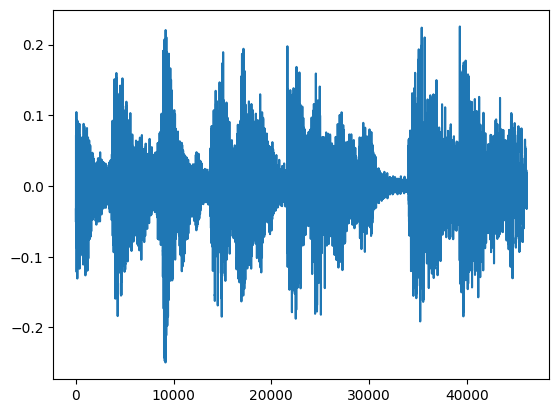

In [13]:
# convert tensor to float datatype,.
tensor = tf.cast(audio_t, tf.float32) / 32767.0
print(tensor)
 
#plot the graph.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tensor.numpy())
plt.show()

### Trimming

In [14]:
# Trim silence from the beginning and end of the audio signal
trimed = tfio.audio.trim(tensor,
                         axis=0,
                         epsilon=0.2)
print('Trimmed :',trimed)

Trimmed : tf.Tensor([ 9072 39297], shape=(2,), dtype=int64)


START:9072,
STOP :39297
Trimmed Audio shape: (30225,)


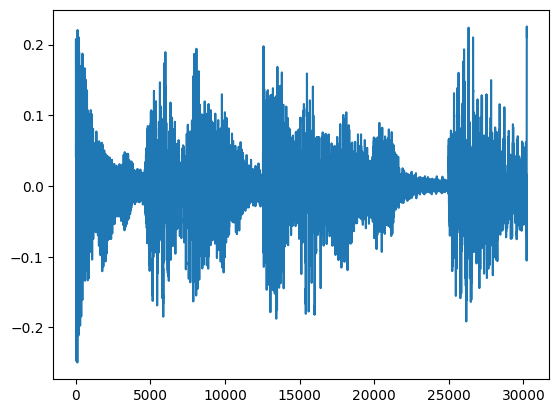

In [15]:
#Mention the stating and ending limit
start = trimed[0]
stop = trimed[1]
print("START:{},\nSTOP :{}".format(start.numpy(),stop.numpy()))

trimmed_audio = tensor[start:stop]
print('Trimmed Audio shape:',trimmed_audio.shape)
 
plt.figure()
plt.plot(trimmed_audio.numpy())

In [16]:
#to play the audio,
Audio(trimmed_audio.numpy(), rate=audio_data.rate.numpy())

### Fade in and out

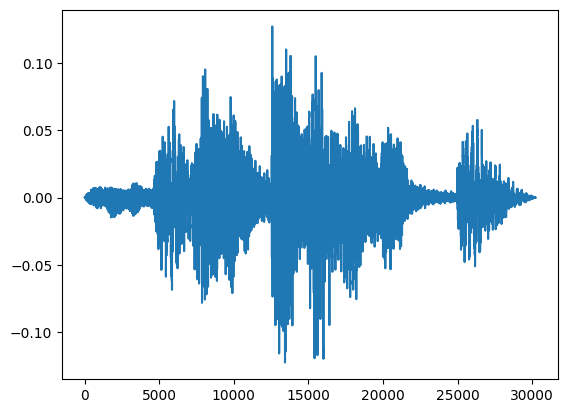

In [17]:
#Apply a fade-in and fade_out effect with a duration
audio_fade = tfio.audio.fade(trimmed_audio, fade_in=20000, fade_out=20000, mode="logarithmic")
 
plt.figure()
#plotting the faded audio.
plt.plot(audio_fade.numpy())

In [18]:
#to plat the audio
Audio(audio_fade.numpy(), rate=audio_data.rate.numpy())